In [2]:
import data
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'Regression'

In [2]:
df = data.load_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.data.txt')
df2 = data.summarize_data(df)
df_attributes = data.label_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.attributes.txt', df2)
cleaned_df = data.clean_data(df_attributes)

C:\Users\catic\Documents\EECE 2300\python\crime_term_project\crime_term_project\data.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col][row + 1] = count


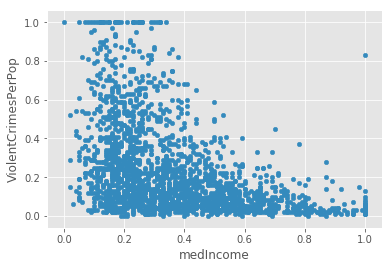

In [3]:
cleaned_df.plot.scatter(x="medIncome", y= "ViolentCrimesPerPop")

This shows that there is an obvious negaative correlation between the number of crimes and the median Income level. Communities with a higher income level have a much lower rate of crimes per population. We also noticed that there is one big outlier, where the medIncome is listed at the highest, but there is still a high rate of crimes, which could skew the data.

In [4]:
print(cleaned_df['ViolentCrimesPerPop'].mean())
print(cleaned_df['ViolentCrimesPerPop'].median())

0.23797893681043028
0.15


The mean and median ViolentCrimesPerPop will help us to later see what should be classified as a low, medium and high levels of crime. We can now see that it is probably unusualy for the violentcrimesperpop rate to be above .5, and those with a higher rate should be classified as such. 

In [10]:
# encode state labels to range from [0, n-1]
le = preprocessing.LabelEncoder()
le.fit(cleaned_df['state'])

cleaned_df['state'] = le.transform(cleaned_df['state'])

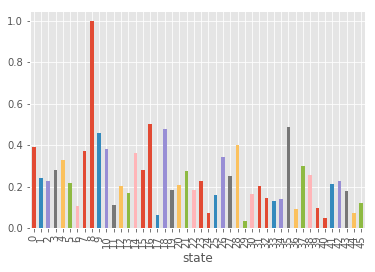

In [12]:

grouped_state = cleaned_df.groupby('state').mean()
grouped_state['ViolentCrimesPerPop'].plot.bar()

This made us realize, that the numbers relating to states are off and some numbers are skipped, resulting in 56 states. We will have to go back a check if any states are missing/reassign states to their correct numbers as to not create confusion in the future.

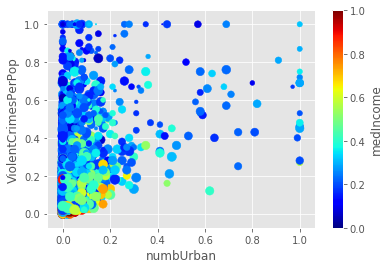

In [15]:
size = cleaned_df['racePctWhite']*100
fig, ax = plt.subplots()
cleaned_df.plot.scatter(x="numbUrban", y = "ViolentCrimesPerPop", s = size, c= 'medIncome',
                        colormap= 'jet', ax=ax)

This graph has many different attributes to compare, as we saw before that as medIcome increases, as does the rate of violent crimes, which we see since all red and orange dots are at the bottom. As well we can see on the x axis that there are not many communities with a high number of people living in urban areas, but for the ones that do have a higher percentage, they also tend to have an income on the lower part of the scale and a higher rate of violent crimes. Lastly, the size of each dot represent the percent of population that is caucasian. While it is difficult to see exactly, since theere are so many data points, it seems as the datapoints get closer to the lower left corner, the dots tend to be larger, concluding that the percent of caucasians is larger when the income is higher and the violent crimes are lower. 

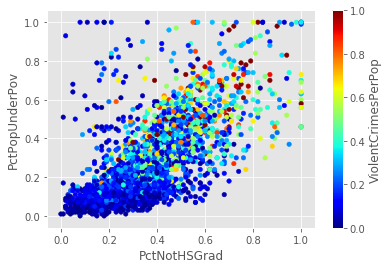

In [19]:
fig, ax = plt.subplots()
cleaned_df.plot.scatter(x='PctNotHSGrad', y='PctPopUnderPov', c = 'ViolentCrimesPerPop',
                        colormap= 'jet', ax=ax)

From this we can see that there is a strong positive correlation between the percent of the population under the poverty level and the percent that have not graduated highschool. As one increases, as does the other. As well, we see that as each increases, there is a much greater number of non-blue data point, meaning that the rate of violent crimes as well increases.

C:\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


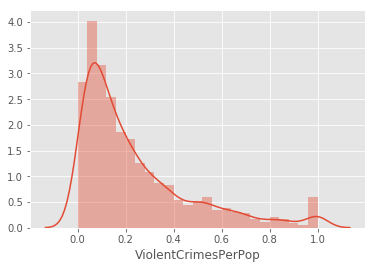

In [20]:
import seaborn as sns
sns.distplot(cleaned_df.ViolentCrimesPerPop)

In [ ]:
fig, ax = plt.subplots()
size = cleaned_df['racepctblack']*100
cleaned_df.plot.scatter(x='PctIlleg', y='PctKids2Par', s=size, c='ViolentCrimesPerPop',
                        colormap='Reds', ax=ax)
plt.ylabel("Pct kids in family housing w/ two parents")
plt.xlabel("Pct kids born to never married")
